Unsupervised Learning Algorithms

There are mainly 3 types of Unsupervised Algorithms that are used
1. Clustering Algorithms
2. Association Rule Learning
3. Dimensionality Reduction.

Clustering is an unsupervised machine learning technique that groups unlabeled data into clusters based on similarity. Its goal is to discover patterns or relationships within the data without any prior knowledge of categories or labels.

>Groups data points that share similar features or characteristics.
>Helps find natural groupings in raw, unclassified data.
>Commonly used for customer segmentation, anomaly detection and data organization.
>Works purely from the input data without any output labels.
>Enables understanding of data structure for further analysis or decision-making.

Some common clustering algorithms: 

1: K-means Clustering: Groups data into K clusters based on how close the points are to each other.
2: Hierarchical Clustering: Creates clusters by building a tree step-by-step, either merging or splitting groups.
3: Density-Based Clustering (DBSCAN): Finds clusters in dense areas and treats scattered points as noise.
4: Mean-Shift Clustering: Discovers clusters by moving points toward the most crowded areas.
5: Spectral Clustering: Groups data by analyzing connections between points using graphs.


K means Clustering
>>K-Means Clustering groups similar data points into clusters without needing labeled data.
>It is used to uncover hidden patterns when the goal is to organize data based on similarity.

>Helps identify natural groupings in unlabeled datasets
>Works by grouping points based on distance to cluster centers
>Commonly used in customer segmentation, image compression, and pattern discovery
>Useful when you need structure from raw, unorganized data


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Load the dataset
df = pd.read_csv('/home/santos/Desktop/ML/IRIS.csv')
# Step 1: Extract features
X = df.drop(columns=['species'])

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Show the first few rows with cluster assignments
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,1


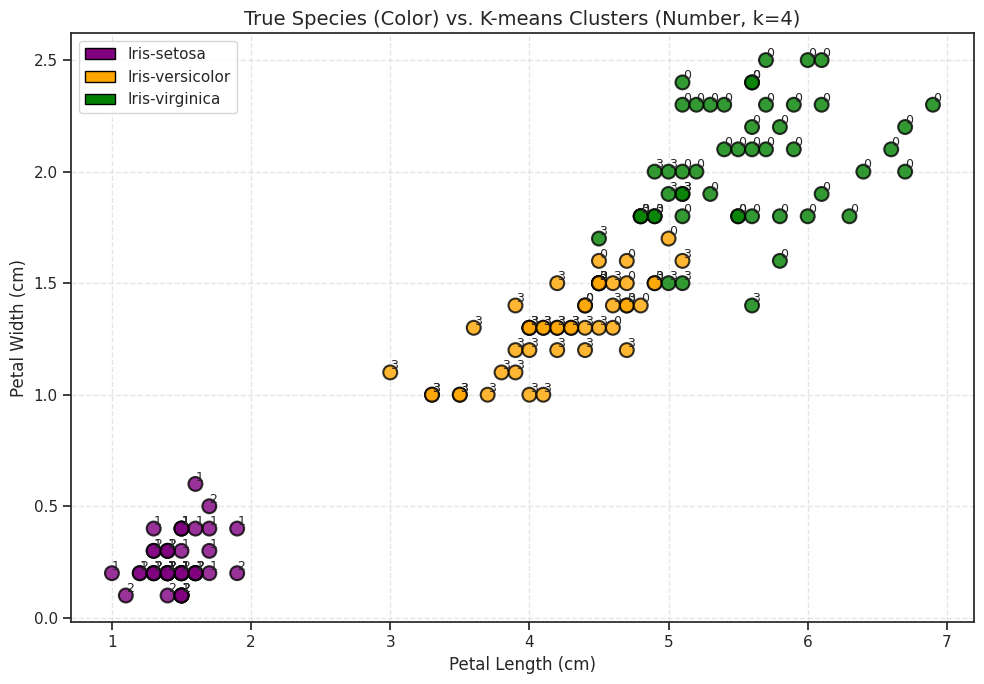

In [36]:
# Map species to colors
species_colors = {
    'Iris-setosa': 'purple',
    'Iris-versicolor': 'orange',
    'Iris-virginica': 'green'
}
df['color'] = df['species'].map(species_colors)

# Plot using petal features (best separation)
plt.figure(figsize=(10, 7))

# Scatter plot: color = true species, marker size = normal
scatter = plt.scatter(
    df['petal_length'],
    df['petal_width'],
    c=df['color'],
    s=100,
    alpha=0.8,
    edgecolors='black',  # Add black edge to see cluster boundary
    linewidths=1.5
)

# Annotate each point with its cluster number (0,1,2,3)
for i in range(len(df)):
    plt.text(
        df.iloc[i]['petal_length'] + 0.03,
        df.iloc[i]['petal_width'] + 0.03,
        str(df.iloc[i]['cluster']),
        fontsize=9,
        ha='center',
        va='center'
    )

# Labels and legend
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('True Species (Color) vs. K-means Clusters (Number, k=4)', fontsize=14)

# Create custom legend for species
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='purple', edgecolor='black', label='Iris-setosa'),
    Patch(facecolor='orange', edgecolor='black', label='Iris-versicolor'),
    Patch(facecolor='green', edgecolor='black', label='Iris-virginica')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()